# Predicition

In [1]:
import numpy as np
from datascience import *

import warnings
warnings.simplefilter('ignore', FutureWarning)

import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import matplotlib.colors as mcolors

In [2]:
galton = Table().read_table('galton.csv')
midparent_height = (galton.column('Father') + galton.column('Mother'))/2
heights = Table().with_columns('MidParent', midparent_height, 
                              'Child', galton.column('Child'))
heights

MidParent,Child
72.75,73.2
72.75,69.2
72.75,69
72.75,69
71,73.5
71,72.5
71,65.5
71,65.5
69.5,71
69.5,68


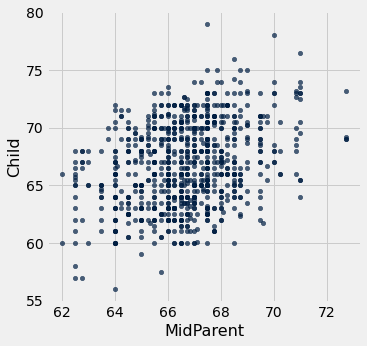

In [3]:
heights.scatter('MidParent')

In [4]:
def predict_child(x):
    chosen = heights.where('MidParent', are.between(x - 0.5, x + 0.5))
    return np.average(chosen.column('Child'))
predict_child(62)

63.0

Use the `.apply` method to use the `predict_child` function on every row in the `heights` table.

In [5]:
predictions = heights.apply(predict_child, 'MidParent')

Let's compare our predictions to the actual values.

In [6]:
heights = heights.with_column('Original Prediction', predictions)
heights

MidParent,Child,Original Prediction
72.75,73.2,70.1
72.75,69.2,70.1
72.75,69,70.1
72.75,69,70.1
71,73.5,70.4158
71,72.5,70.4158
71,65.5,70.4158
71,65.5,70.4158
69.5,71,68.5025
69.5,68,68.5025


Let's use a scatter plot to visualize our predictions and the actual values.

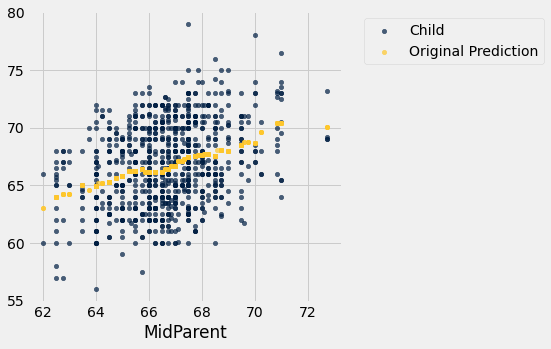

In [7]:
heights.scatter('MidParent')

# Linear Regression

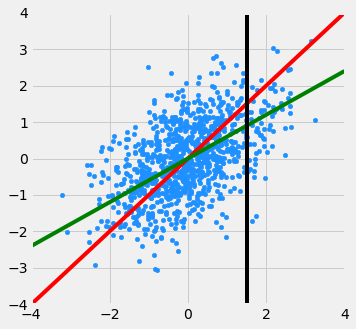

In [8]:
def r_scatter(r):
    plt.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plt.scatter(x, y, color = 'dodgerblue', s = 20)
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    
def draw_line(slope = 0, intercept = 0, x = make_array(-4,4), color = 'r'):
    y = x*slope + intercept
    plt.plot(x, y, color = color)

def draw_vertical_line(x_position, color = 'black'):
    x = make_array(x_position, x_position)
    y = make_array(-4, 4)
    plt.plot(x, y, color = color)

def both_lines(slope1 = 0, slope2 = 0, x_position = 0, intercept = 0, x = make_array(-4,4), color1 = 'r', color2 = 'green'):
    y1 = x*slope1 + intercept
    y2 = x*slope2 + intercept
    plt.plot(x, y1, color = color1);
    plt.plot(x, y2, color = color2);
    draw_vertical_line(x_position)
    
r = 1
r_scatter(0.5);
#draw_line(r);
both_lines(r, 0.6, 1.5);
#draw_vertical_line(1.5);

# Equation of the Regression Line

In [13]:
def standard_units(x):
    return(x - np.average(x))/np.std(x)

def correlation(t, x, y):
    x_su = standard_units(t.column(x))
    y_su = standard_units(t.column(y))
    return np.average(x_su*y_su)
    
def slope(t, x, y):
    r = correlation(t, x, y)
    return r*np.std(t.column(y))/np.std(t.column(x))

def intercept(t, x, y):
    a = slope(t, x, y)
    return np.average(t.column(y))-a*np.average(t.column(x))

In [14]:
galton_slope = slope(heights, 'MidParent', 'Child')
galton_intercept = intercept(heights, 'MidParent', 'Child')
galton_slope, galton_intercept

(0.6692588951325452, 22.14880916454139)

In [15]:
heights.take(2)

MidParent,Child,Original Prediction
72.75,69,70.1


In [16]:
galton_slope*72.75 + galton_intercept

70.83739378543405

In [17]:
def fitted_values(t, x, y):
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x)+b

In [18]:
regression_predictions = fitted_values(heights, 'MidParent', 'Child')
heights = heights.with_column('Regression Prediction', regression_predictions)

In [19]:
heights

MidParent,Child,Original Prediction,Regression Prediction
72.75,73.2,70.1,70.8374
72.75,69.2,70.1,70.8374
72.75,69,70.1,70.8374
72.75,69,70.1,70.8374
71,73.5,70.4158,69.6662
71,72.5,70.4158,69.6662
71,65.5,70.4158,69.6662
71,65.5,70.4158,69.6662
69.5,71,68.5025,68.6623
69.5,68,68.5025,68.6623


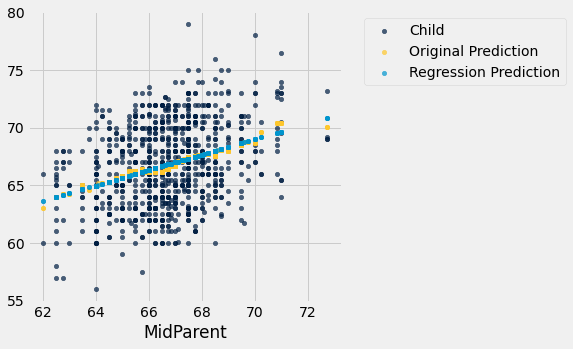

In [20]:
heights.scatter('MidParent')